In [1]:
from __future__ import annotations

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from swarm_visualizer.boxplot import plot_grouped_boxplot, plot_paired_boxplot
from swarm_visualizer.utility.general_utils import save_fig, set_plot_properties
import seaborn as sns
from swarm_visualizer.utility.statistics_utils import add_wilcoxon_value

In [2]:
# Example Plots location

_X1_DATA = np.load("../commonvoice_experiments/commonvoice_100usr_inference_results_securespectra.npy")
_X2_DATA = np.load("../commonvoice_experiments/commonvoice_100usr_inference_results_securespectra_DP.npy")
_X3_DATA = np.load("../commonvoice_experiments/commonvoice_100usr_inference_results_securespectra_verificationonly.npy")
_X4_DATA = np.load("../commonvoice_experiments/whisperBasedAccs.npy")/100
_X5_DATA = np.load("../commonvoice_experiments/all_accs_per_client.npy")


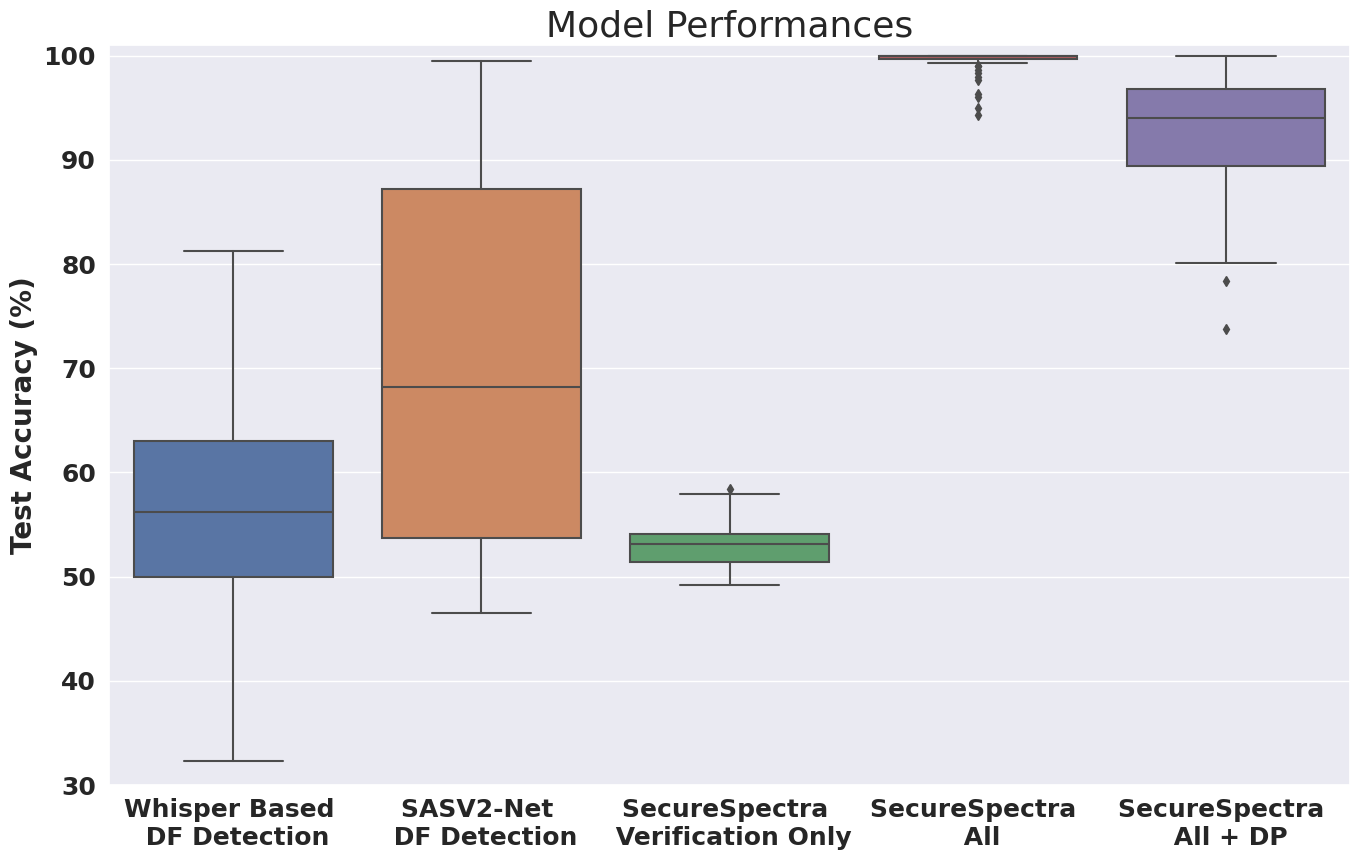

In [3]:
# Concatenate the data
_X_DATA = np.concatenate([_X4_DATA, _X5_DATA, _X3_DATA, _X1_DATA, _X2_DATA])*100
_X_LABEL = np.concatenate([np.repeat("Whisper Based \n DF Detection",100),np.repeat("SASV2-Net \n DF Detection",100), np.repeat("SecureSpectra \n Verification Only",100), np.repeat("SecureSpectra \n All", 100), np.repeat("SecureSpectra \n All + DP", 100)])



_DATA_FRAME = pd.DataFrame(
    {"$y$": _X_DATA, "$x$": _X_LABEL}
)

set_plot_properties()
fig, ax = plt.subplots(figsize=(14, 9))
# Create a grouped boxplot
plot_grouped_boxplot(
    df=_DATA_FRAME, x_var=_X_LABEL, y_var=_X_DATA, title_str="Model Performances", ax=ax
)

# add_wilcoxon_value(
#     df=_DATA_FRAME,
#     x_var="$x$",
#     y_var="$y$",
#     # order_list=["Whisper Based \n DF Detection", "SASV2-Net \n DF Detection"],
#     ax=ax,
#     box_pairs=[(('Whisper Based \n DF Detection'), ('SASV2-Net \n DF Detection'))],
#     test_type="Wilcoxon",
#     text_format="star",
#     loc="inside",
#     fontsize=20,
#     verbose=2,
#     hue=None
# )


ax.set_ylabel("Test Accuracy (%)")

# Save the plot
ax.set_ylim([30, 101])
plt.show()
save_loc = os.path.join("./", "boxplots", "Model Performances Boxplots.png")
save_fig(fig, save_loc, dpi=600)

